In [2]:
import numpy as np
import pandas as pd
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
df1 = pd.read_csv("car_data.csv")

In [4]:
df1.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df1.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
numeric_variables = df1[['ID','symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']].copy()

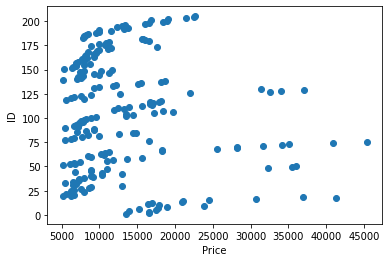

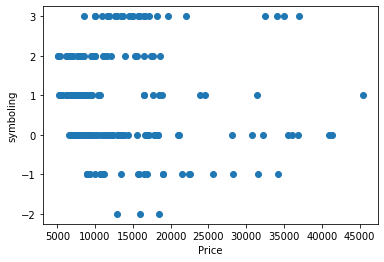

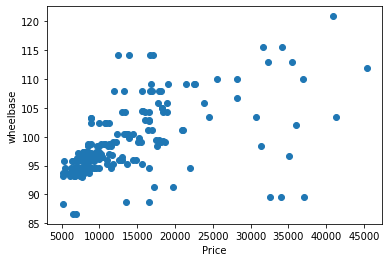

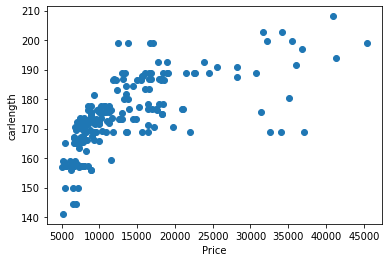

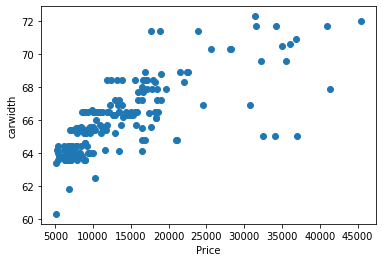

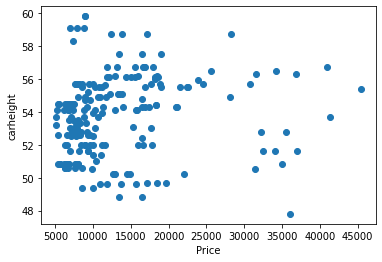

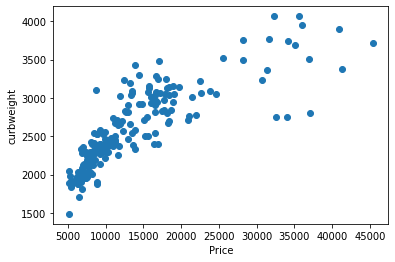

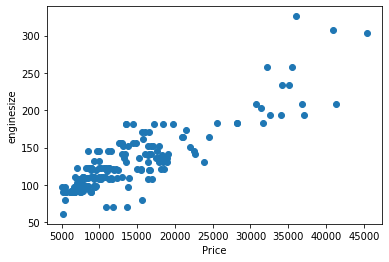

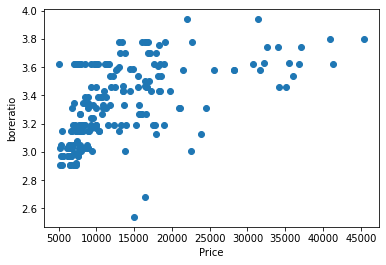

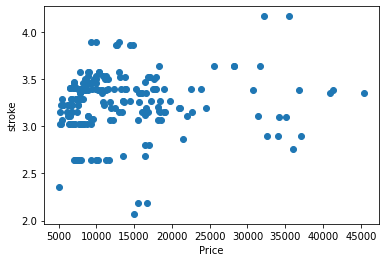

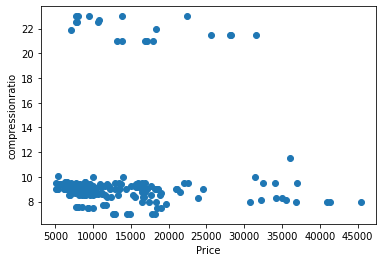

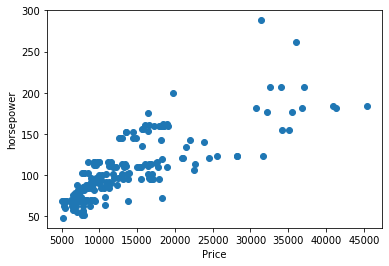

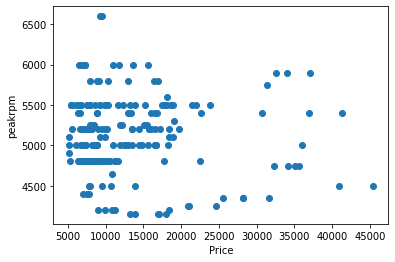

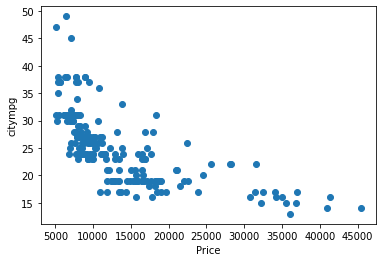

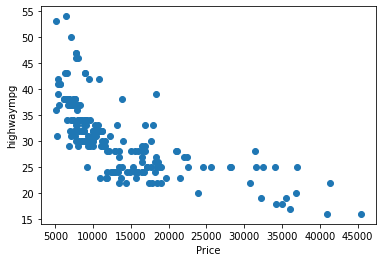

In [7]:
for i in range(len(numeric_variables.columns)-1):
    f = plt.scatter(numeric_variables["price"],numeric_variables.iloc[:,i])
    plt.xlabel("Price")
    plt.ylabel(numeric_variables.columns[i])
    plt.show()
    print("\n")

### the most 4 correlated features with the price are:
>carwidth

>curbweight

>enginesize

>horsepower

In [8]:
new_df = df1[['carwidth','curbweight','enginesize','horsepower','price']].copy()
new_df.head()

,carwidth,curbweight,enginesize,horsepower,price
0,64.1,2548,130,111,13495.0
1,64.1,2548,130,111,16500.0
2,65.5,2823,152,154,16500.0
3,66.2,2337,109,102,13950.0
4,66.4,2824,136,115,17450.0


In [9]:
min_value = new_df.min()
max_value = new_df.max()
max_value

carwidth         72.3
curbweight     4066.0
enginesize      326.0
horsepower      288.0
price         45400.0
dtype: float64

In [10]:
normalized_df = (new_df - min_value) / (max_value - min_value)
normalized_df

,carwidth,curbweight,enginesize,horsepower,price
0,0.316667,0.411171,0.260377,0.262500,0.207959
1,0.316667,0.411171,0.260377,0.262500,0.282558
2,0.433333,0.517843,0.343396,0.441667,0.282558
3,0.491667,0.329325,0.181132,0.225000,0.219254
4,0.508333,0.518231,0.283019,0.279167,0.306142
...,...,...,...,...,...
200,0.716667,0.567882,0.301887,0.275000,0.291123
201,0.708333,0.605508,0.301887,0.466667,0.345738
202,0.716667,0.591156,0.422642,0.358333,0.406311
203,0.716667,0.670675,0.316981,0.241667,0.430763


In [177]:
#shuffle our data
shuffled_df = normalized_df.sample(frac=1).reset_index(drop=True)
shuffled_df.head()

,carwidth,curbweight,enginesize,horsepower,price
0,0.450000,0.347944,0.033962,0.220833,0.211683
1,0.925000,0.525989,0.283019,0.258333,0.312596
2,0.291667,0.185803,0.109434,0.083333,0.027581
3,0.275000,0.311094,0.116981,0.058333,0.069013
4,0.291667,0.194337,0.109434,0.083333,0.061839


In [178]:
len(shuffled_df.index)

205

In [179]:
test_data, train_data = shuffled_df[:40], shuffled_df[40:]

In [180]:
test_data = test_data.reset_index(drop=True)
train_data = train_data.reset_index(drop=True)

In [181]:
len(test_data.index)

40

In [182]:
len(train_data.index)

165

In [212]:
def mean_squared_error(data_x,data_y,slop,y_intercept):
    cost = 0.0
    for i in range(data_x.shape[0]):
        model_value = np.dot(data_x[i] , slop) + y_intercept
        cost = cost + (model_value - data_y[i])**2
    cost = cost/ (2*data_x.shape[0])
    return cost

 gradint descent :
 $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}   \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

and the partial derivative can be calculated as :
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

In [213]:
def get_derivative (data_x,data_y,slop_list):
    m,n = data_x.shape
   
    fn_predictions = np.dot(data_x,slop_list)
    diff = fn_predictions - data_y
    error = np.dot(data_x.transpose(),diff)
    error/=m
    return error

In [214]:
def gradient_descent (data_x,data_y,slop,learning_rate,max_num_iters,threshold):
    cost_every_iteration = []
    for i in range(num_iters):
        descent = learning_rate *get_derivative(data_x,data_y,slop)
        slop-=descent
        cost_every_iteration.append(mean_squared_error(data_x,data_y,slop,y_intercept))
        if(i!=0):
            if(cost_every_iteration[i-1]-cost_every_iteration[i] < threshold):
                break;
    return slop, cost_every_iteration
    

In [184]:
train_data['ones']=1

In [191]:
train_data.head()

,carwidth,curbweight,enginesize,horsepower,price,ones
0,0.575000,0.561288,0.301887,0.275000,0.269773,1
1,0.291667,0.212956,0.135849,0.087500,0.071521,1
2,0.275000,0.192785,0.116981,0.058333,0.005710,1
3,0.300000,0.207913,0.116981,0.116667,0.054044,1
4,0.408333,0.324282,0.222642,0.204167,0.095105,1


In [215]:
x = train_data.drop(columns = ['price']).to_numpy().reshape((-1,5))
y = train_data['price']
slop = [1,1,1,1,1]
y_intercept = 0
learning_rate = 0.1
max_num_iters = 50
threshold = 0.0001
slop, cost_every_iteration = gradient_descent(x,y,slop,learning_rate,max_num_iters,threshold)

In [216]:
mean_squared_error(x,y,slop, y_intercept)

0.008404890780904664

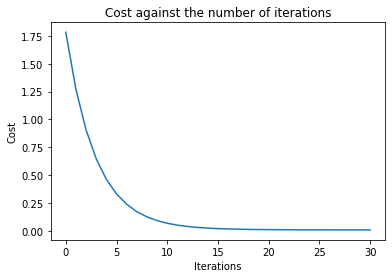

In [217]:
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost against the number of iterations')
_ = plt.plot(cost_every_iteration)